# SOM for SL

- author : Sylvie Dagoret-Campagne
- affiliation  : IJCLab
- creation date : 2023/01/09
- last update : 2023/01/13


- Intuitive introduction on SOM on You Tube by Kimia lab : https://www.youtube.com/watch?v=lFbxTlD5R98



- https://github.com/JustGlowing/minisom
- https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
- https://github.com/sylvielsstfr/Photoz-tools/blob/sdc_2022/KSOM_lsst.ipynb
- https://github.com/JospehCeh/PhotoZ_PhD/tree/u/dagoret

https://heartbeat.comet.ml/introduction-to-self-organizing-maps-soms-98e88b568f5d

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from sklearn_som.som import SOM
from minisom import MiniSom

In [3]:
%matplotlib inline
import numpy as np
import os
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
from itertools import cycle

In [4]:
from astropy.io import fits

In [5]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.left': True,
          'figure.figsize': [18, 10],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)


## Start

In [6]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/sylvie/MacOSX/GitHub/LSST/PhotoZ_PhD/SOM


## Config

In [7]:
FLAG_CHECK_CONVERGENCE = True
FLAG_VIEW_CLUSTERING = True

## Read input file

In [8]:
all_filenames = ['datatools/pca_SL_data.fits','datatools/pca_Brown_data.fits','datatools/pca_BruzualCharlot_data.fits']

# choose the SED
infile_idx=0
filename = all_filenames[infile_idx]
hdu = fits.open(filename)
data_in=hdu[0].data
hdr_in = hdu[0].header

In [9]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [10]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
spec = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_5812/3365842016.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 0, '$\\lambda (\\AA)$')

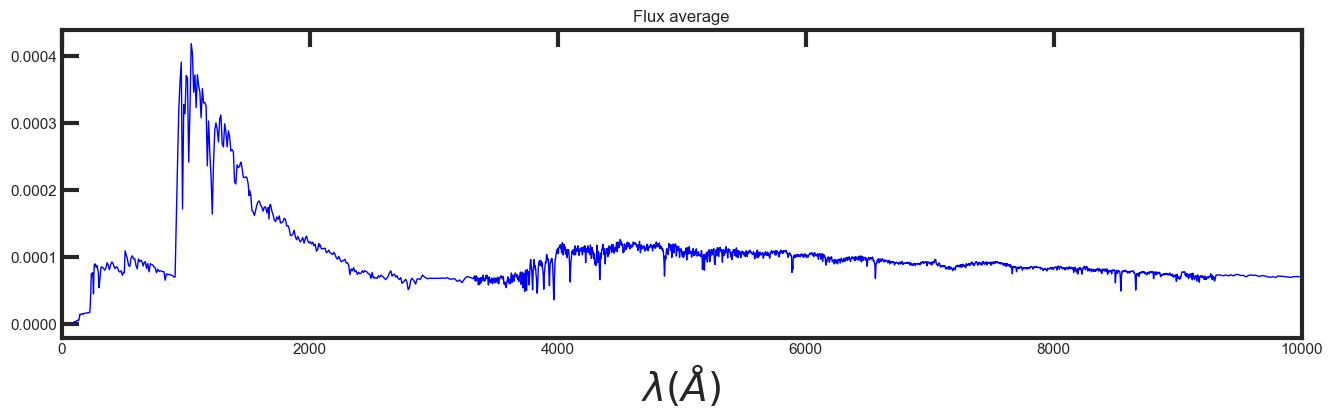

In [11]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-',lw=1)
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")
plt.xlabel("$\lambda (\AA)$")

# Normalize the data

- this standardisation is mandatory here

In [12]:
X = (spec - np.mean(spec, axis=0)) / np.std(spec, axis=0)

# SOM

- The best Intuitive introduction to SOM can be found in  youtube : https://www.youtube.com/watch?v=lFbxTlD5R98 in Kimia lab chain

   
Input: dataset, size and topology of the map

Output: the codebook for each output node

        Randomize the map’s nodes weight
        Select randomly one instance
        Find the closest node: best matching unit
        The codebook of this node is updated
        The codebooks of the adjacent nodes are also updated, by not to the same degree
        Reduce the intensity of the update progressively
        Repeat 1 to 6 for Tmax iterations

Weight update rule for a node
, knowing that

is the winning node:

: learning rate

: neighbourhood function
where

is the euclidian distance between node i and j on Kohonen (flat-2D ) map

and

    are hyperparameters



- https://github.com/sylvielsstfr/Photoz-tools/blob/sdc_2022/KSOM_lsst.ipynb

In [13]:
# Initialization and training


n_neurons = 70
m_neurons = 70
learning_rate_0=0.5
sigma_0 = 10
Niter = 500

#som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=1.5, learning_rate=.1, neighborhood_function='gaussian', random_seed=0)
som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=sigma_0, learning_rate=learning_rate_0, neighborhood_function='gaussian', random_seed=0)
              
    
som.pca_weights_init(X)
som.train(X, Niter, verbose=True)  # random training

/Users/sylvie/anaconda3/lib/python3.9/site-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 8.340577749046462


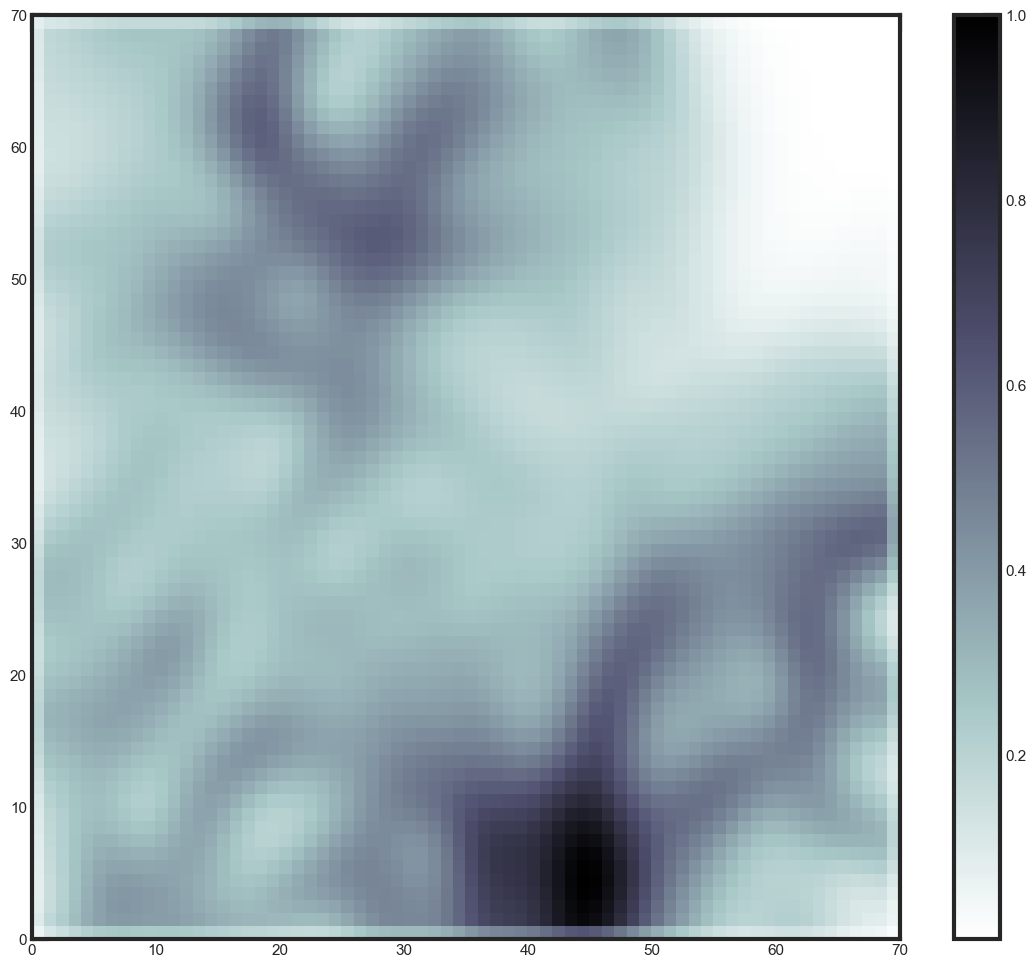

In [14]:
plt.figure(figsize=(14, 12))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

## Position of inputs on SOM map

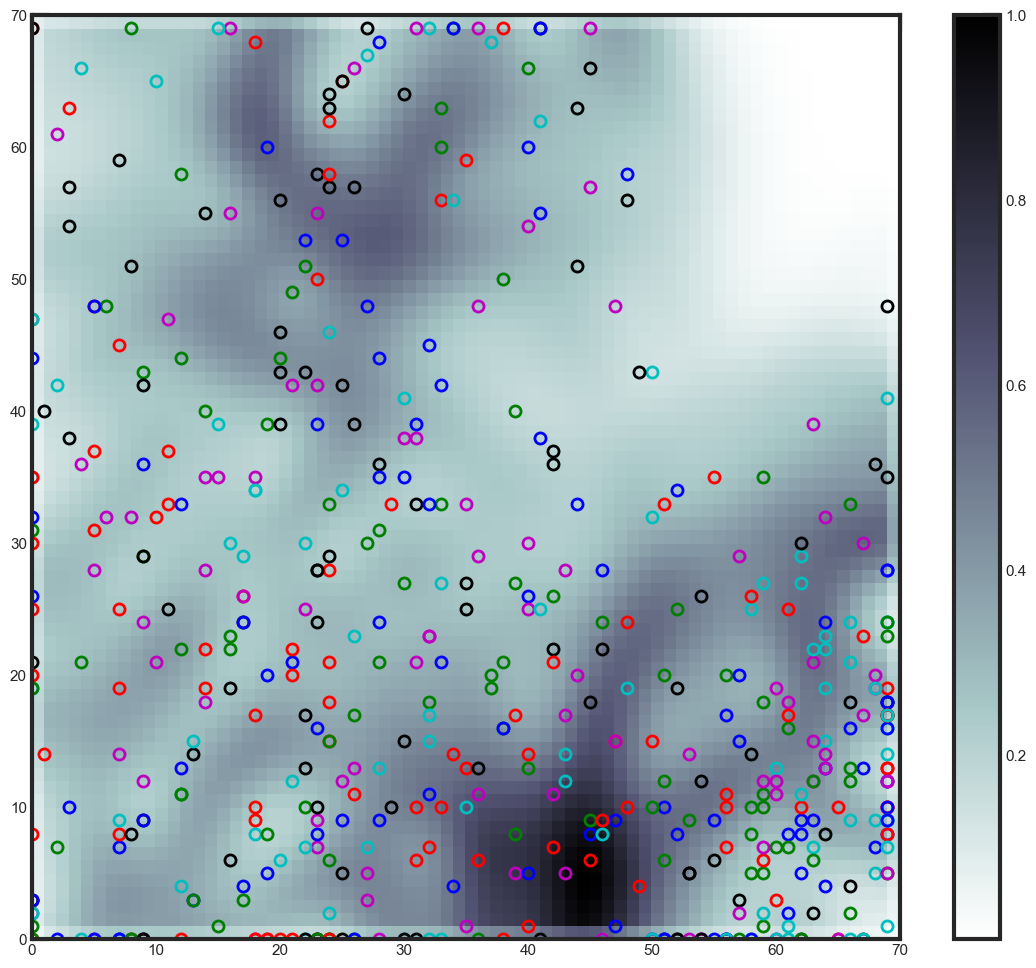

In [15]:
cycol = cycle('bgrcmk')

plt.figure(figsize=(14, 12))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label



for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0], w[1], 'o', markerfacecolor='None',markeredgecolor=next(cycol), markersize=8, markeredgewidth=2)

plt.show()



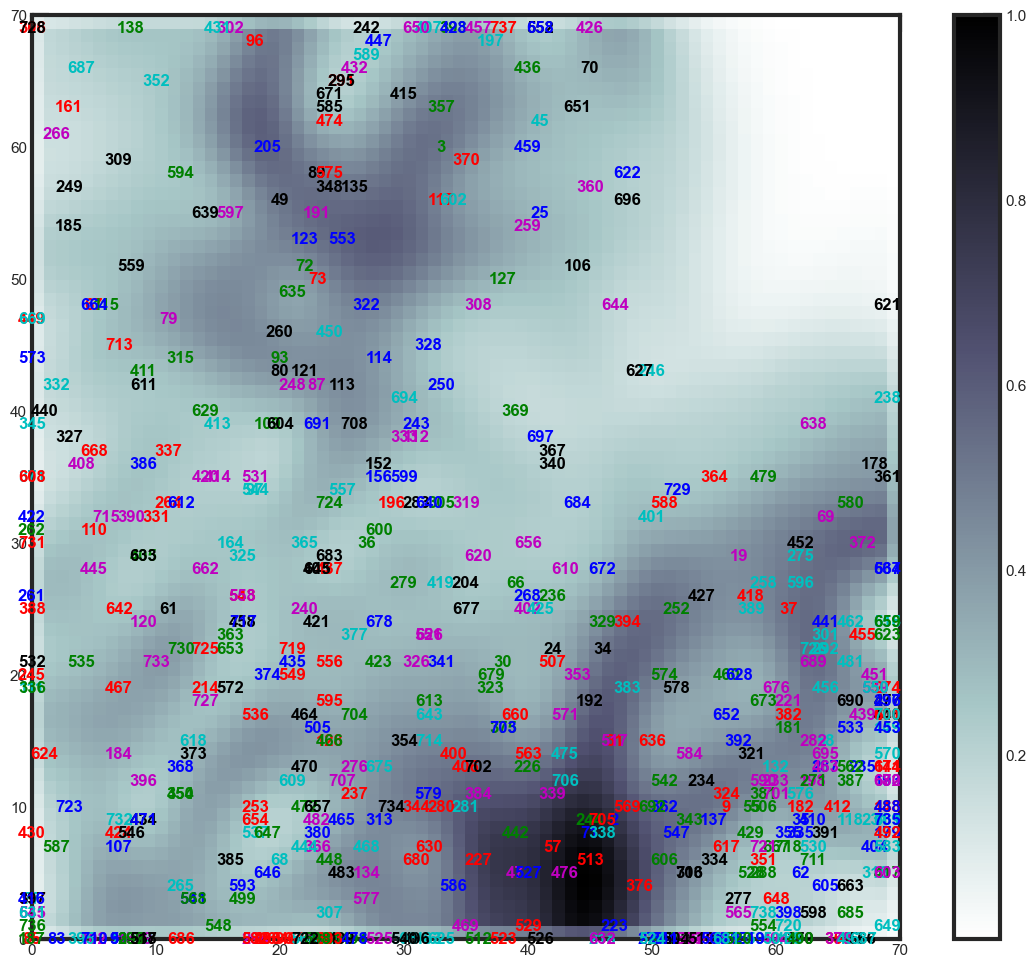

In [16]:
cycol = cycle('bgrcmk')

plt.figure(figsize=(14, 12))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label

for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    #plt.plot(w[0], w[1], 'o', markerfacecolor='None',markeredgecolor='r', markersize=5, markeredgewidth=2)
    the_num=int(all_numbers[cnt])
    plt.text(w[0],w[1],the_num, color=next(cycol),ha="center", va="center",fontsize=12,fontweight="bold")

plt.show()


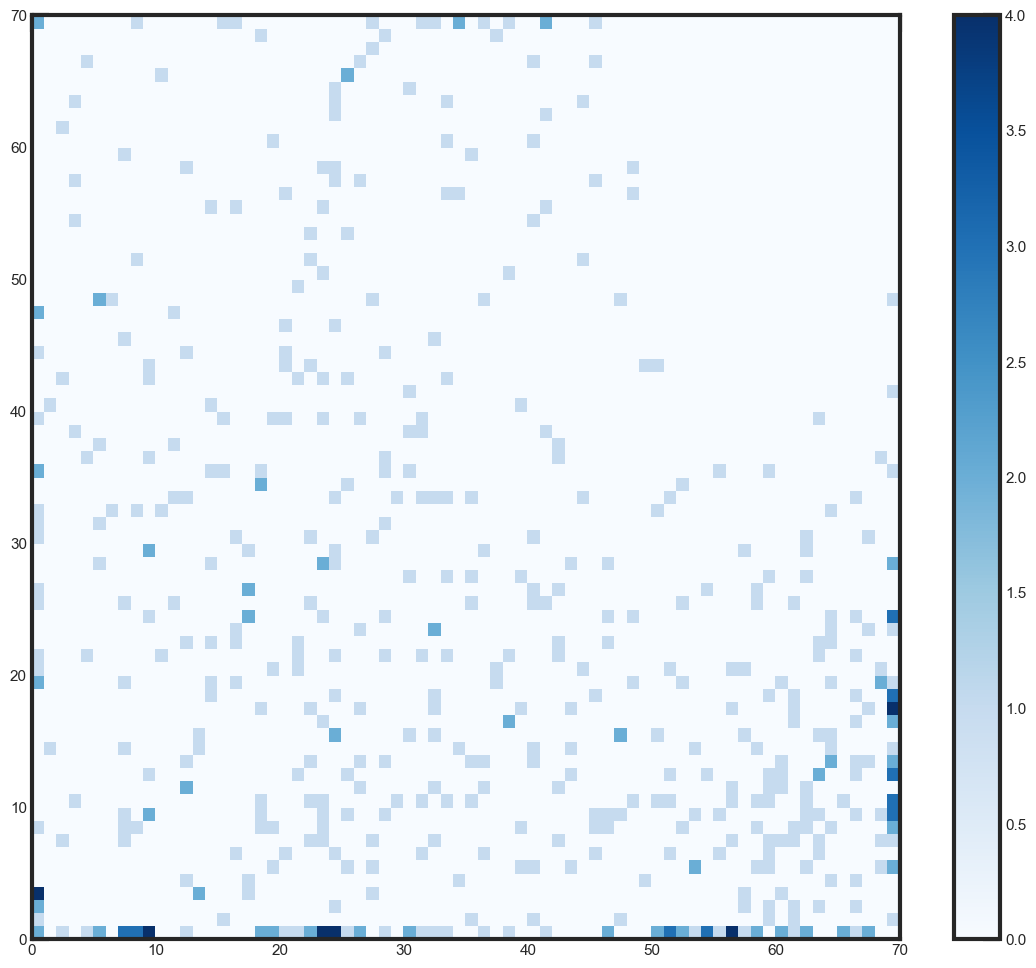

In [17]:
plt.figure(figsize=(14, 12))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()


## Clustering on SOM

In [19]:
from sklearn.cluster import KMeans

In [20]:
if not FLAG_VIEW_CLUSTERING:
    assert False

In [21]:
all_positions = []
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    all_positions.append(w)
all_positions=np.vstack(all_positions)

In [22]:
X1=all_positions

In [23]:
n_clu = 50
km = KMeans(n_clusters = n_clu)
estimator = km.fit(X1)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)
N=X1.shape[0] 

centroids:  [[ 5.96363636e+01  2.82727273e+01]
 [ 1.50000000e+01  1.91818182e+01]
 [ 2.34444444e+01  5.93333333e+01]
 [ 4.50769231e+01  9.53846154e+00]
 [ 5.85454545e+01  1.09090909e+00]
 [ 2.13000000e+01  4.19000000e+01]
 [ 1.66153846e+01  2.23076923e+00]
 [ 4.16000000e+01  3.68000000e+01]
 [ 6.81904762e+01  1.02380952e+01]
 [ 1.30000000e+00  3.53000000e+01]
 [ 1.34000000e+01  6.80000000e+01]
 [ 4.55000000e+01  5.41666667e+01]
 [ 7.64285714e+00 -7.10542736e-15]
 [ 3.13333333e+01  1.53333333e+01]
 [ 2.91666667e+01  3.32500000e+01]
 [ 6.83529412e+01  1.74117647e+01]
 [ 3.96666667e+01  6.73333333e+01]
 [ 2.70000000e+01  6.66666667e+00]
 [ 5.88888889e+00  2.37777778e+01]
 [ 6.09565217e+01  8.95652174e+00]
 [ 5.69230769e+00  4.58461538e+01]
 [ 2.13750000e+01  2.49375000e+01]
 [ 5.06666667e+01  3.33333333e-01]
 [ 4.27857143e+01  2.48571429e+01]
 [ 3.62727273e+01  1.45454545e+00]
 [ 8.50000000e+00  1.00833333e+01]
 [ 3.57500000e+01  5.72500000e+01]
 [ 9.45454545e+00  3.20000000e+01]
 [ 6.733

/Users/sylvie/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

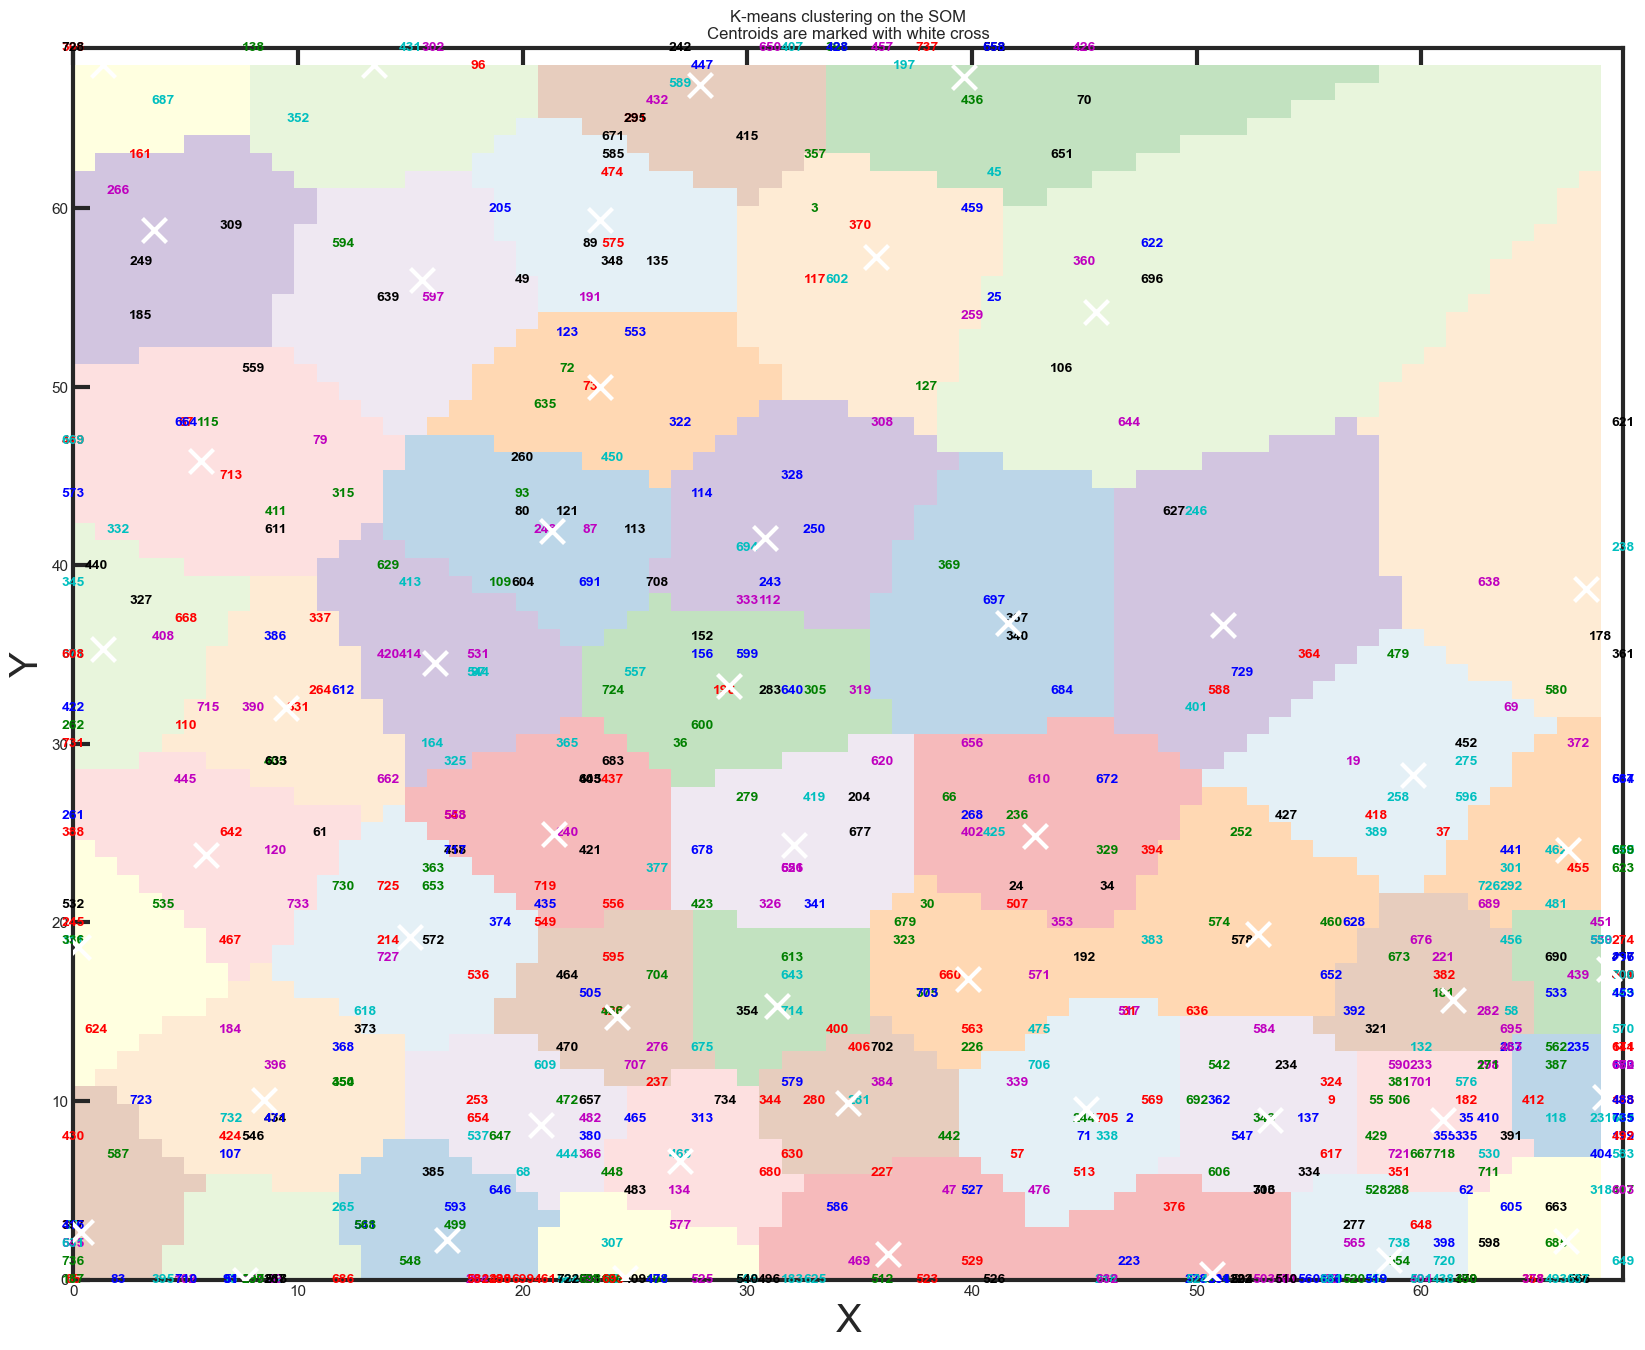

In [25]:
cycol = cycle('bgrcmk')

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 1.0  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X1[:, 0].min() , X1[:, 0].max() 
y_min, y_max = X1[:, 1].min() , X1[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,16))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",alpha=0.3
)

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

for cnt in range(N):
    the_num=int(all_numbers[cnt])
    plt.text(X1[cnt, 0],X1[cnt, 1],the_num, color=next(cycol),ha="center", va="center",fontsize=10,fontweight="bold")


# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=300,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the SOM\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel("X")
plt.ylabel("Y")
#plt.xticks(())
#plt.yticks(())
plt.show()

## Plot Groups of Spectra

In [26]:
# n_clu
ncols = 2
nrows = n_clu//ncols 
if n_clu/ncols> nrows:
    nrows+=1

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_5812/1710306211.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


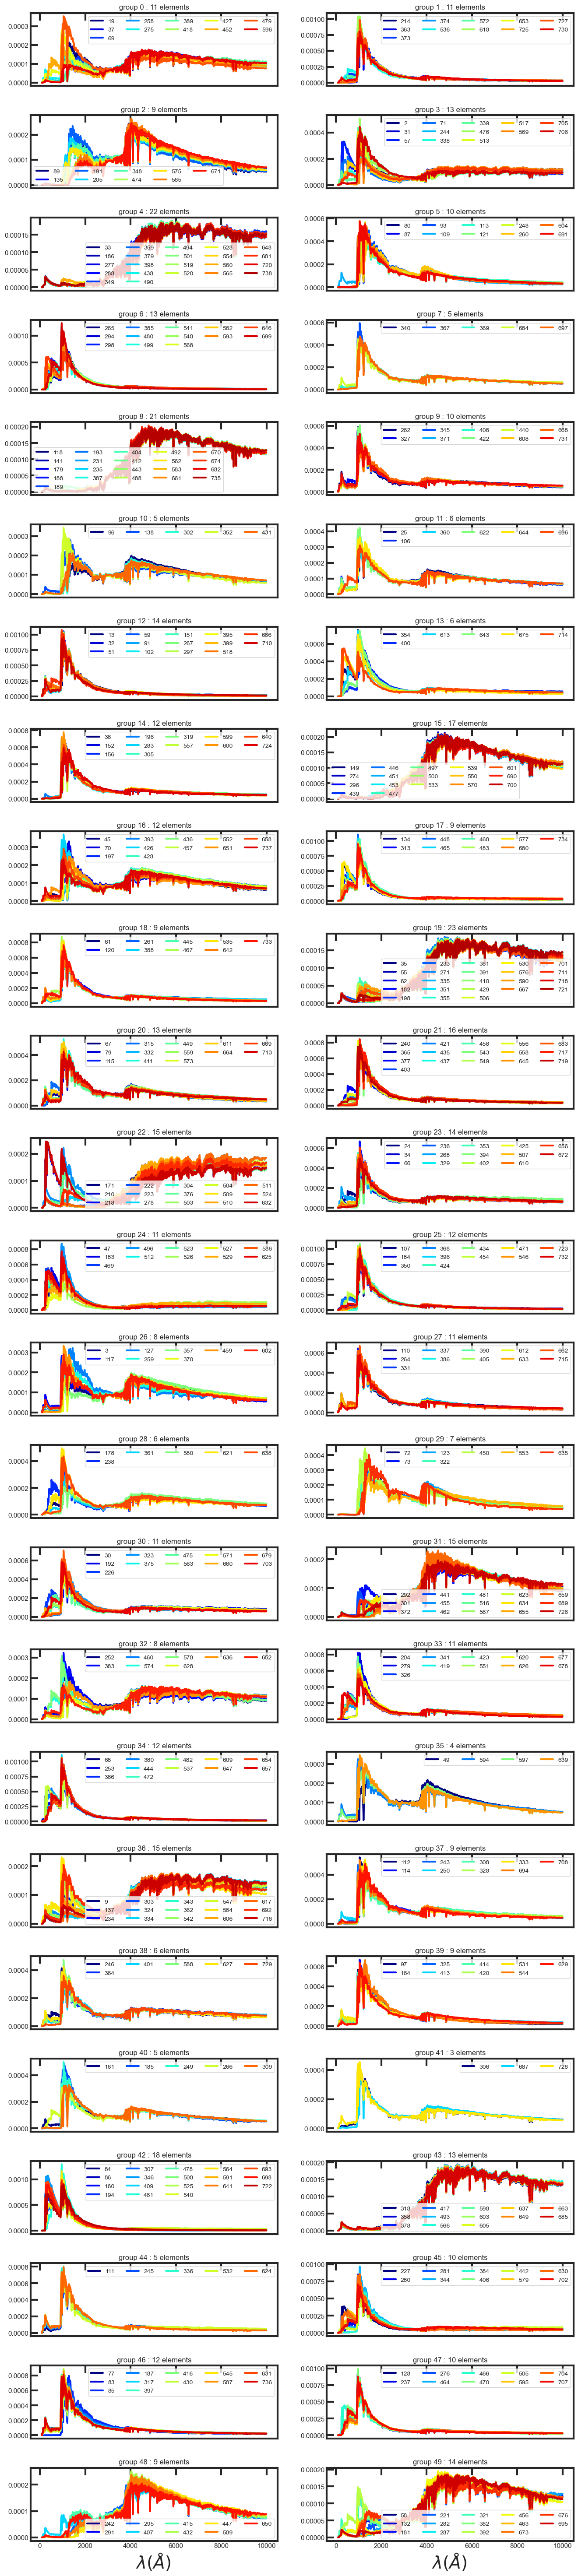

In [27]:

if ncols==2:
    fig = plt.figure(figsize=(16,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==4:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==1:
    fig = plt.figure(figsize=(10,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
else:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
    
    
#axs  = gs.subplots(sharex='col', sharey='row')
axs  = gs.subplots(sharex='col')

for icluster in range(km.n_clusters):
    
    irow=icluster//ncols
    icol=icluster-irow*ncols
    
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        axs[irow,icol].plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
        
    axs[irow,icol].set_title(f"group {icluster} : {NTOPLOT} elements")
    if irow==nrows-1:
        axs[irow,icol].set_xlabel("$\lambda (\AA)$ ")
    axs[irow,icol].legend(loc="best",ncol=5,fontsize=10)
    
plt.tight_layout()

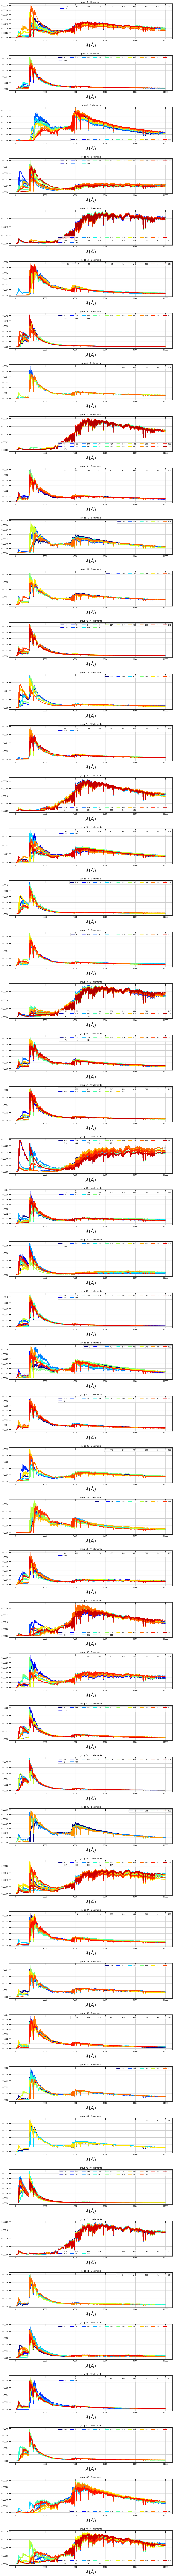

In [28]:
fig = plt.figure(figsize=(14, km.n_clusters*4))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
    ax.grid()
        
        
plt.tight_layout()

## Convergence

In [29]:
if not FLAG_CHECK_CONVERGENCE:
    assert False

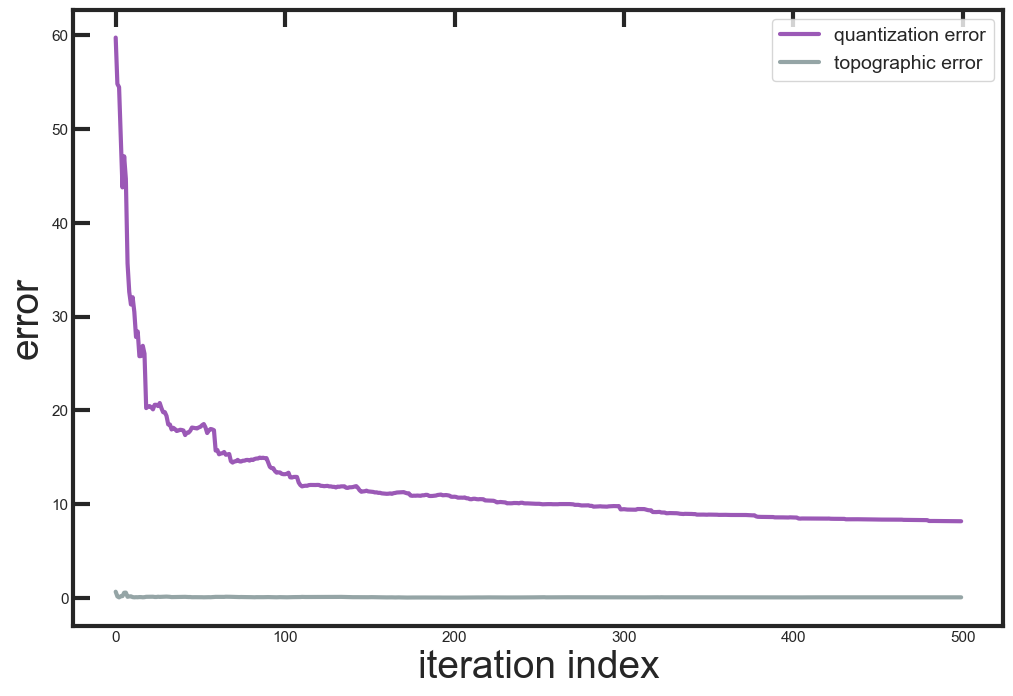

In [30]:
som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=7, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

max_iter = Niter
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.figure(figsize=(12,8))
plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()